Some example links:

https://mybinder.org/v2/gh/pyqtgraph/pyqtgraph/HEAD?urlpath=%2Flab%2Ftree%2Fpyqtgraph%2Fexamples%2Fnotebooks

https://hub.gke2.mybinder.org/user/pyqtgraph-pyqtgraph-mqrwp9hl/lab/tree/pyqtgraph/examples/notebooks/ROIExamples.ipynb


RFBOutputContext()

Generating data, this takes a few seconds...



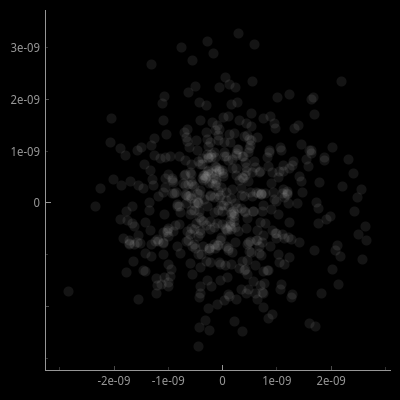

GraphicsLayoutWidget(css_height='400px', css_width='400px')

Output(layout=Layout(border='1px solid black'))

In [3]:
from pyqtgraph.jupyter import GraphicsLayoutWidget
import ipywidgets
from IPython.display import display

from pyqtgraph.Qt import QtGui
import pyqtgraph as pg
import numpy as np
from collections import namedtuple

pg.mkQApp()
view = GraphicsLayoutWidget(css_width="400px", css_height="400px")
# view = pg.GraphicsLayoutWidget()

## create four areas to add plots
# w1 = view.addPlot()
# w2 = view.addViewBox()
# w2.setAspectLocked(True)
# view.nextRow()
# w3 = view.addPlot()
w4 = view.addPlot()
print("Generating data, this takes a few seconds...")

## Make all plots clickable
clickedPen = pg.mkPen('b', width=2)
lastClicked = []
def clicked(plot, points):
    global lastClicked
    for p in lastClicked:
        p.resetPen()
    # with out:
        # print("clicked points", points)
    for p in points:
        p.setPen(clickedPen)
    lastClicked = points
    view.request_draw()


## There are a few different ways we can draw scatter plots; each is optimized for different types of data:

## 1) All spots identical and transform-invariant (top-left plot).
## In this case we can get a huge performance boost by pre-rendering the spot
## image and just drawing that image repeatedly.

# n = 300
# s1 = pg.ScatterPlotItem(size=10, pen=pg.mkPen(None), brush=pg.mkBrush(255, 255, 255, 120))
# pos = np.random.normal(size=(2,n), scale=1e-5)
# spots = [{'pos': pos[:,i], 'data': 1} for i in range(n)] + [{'pos': [0,0], 'data': 1}]
# s1.addPoints(spots)
# w1.addItem(s1)
# s1.sigClicked.connect(clicked)


## 2) Spots are transform-invariant, but not identical (top-right plot).
## In this case, drawing is almsot as fast as 1), but there is more startup
## overhead and memory usage since each spot generates its own pre-rendered
## image.

# TextSymbol = namedtuple("TextSymbol", "label symbol scale")

# def createLabel(label, angle):
#     symbol = QtGui.QPainterPath()
#     #symbol.addText(0, 0, QFont("San Serif", 10), label)
#     f = QtGui.QFont()
#     f.setPointSize(10)
#     symbol.addText(0, 0, f, label)
#     br = symbol.boundingRect()
#     scale = min(1. / br.width(), 1. / br.height())
#     tr = QtGui.QTransform()
#     tr.scale(scale, scale)
#     tr.rotate(angle)
#     tr.translate(-br.x() - br.width()/2., -br.y() - br.height()/2.)
#     return TextSymbol(label, tr.map(symbol), 0.1 / scale)

# random_str = lambda : (''.join([chr(np.random.randint(ord('A'),ord('z'))) for i in range(np.random.randint(1,5))]), np.random.randint(0, 360))

# s2 = pg.ScatterPlotItem(size=10, pen=pg.mkPen('w'), pxMode=True)
# pos = np.random.normal(size=(2,n), scale=1e-5)
# spots = [{'pos': pos[:,i], 'data': 1, 'brush':pg.intColor(i, n), 'symbol': i%10, 'size': 5+i/10.} for i in range(n)]
# s2.addPoints(spots)
# spots = [{'pos': pos[:,i], 'data': 1, 'brush':pg.intColor(i, n), 'symbol': label[1], 'size': label[2]*(5+i/10.)} for (i, label) in [(i, createLabel(*random_str())) for i in range(n)]]
# s2.addPoints(spots)
# w2.addItem(s2)
# s2.sigClicked.connect(clicked)


## 3) Spots are not transform-invariant, not identical (bottom-left).
## This is the slowest case, since all spots must be completely re-drawn
## every time because their apparent transformation may have changed.

# s3 = pg.ScatterPlotItem(
#     pxMode=False,  # Set pxMode=False to allow spots to transform with the view
#     hoverable=True,
#     hoverPen=pg.mkPen('g'),
#     hoverSize=1e-6
# )
# spots3 = []
# for i in range(10):
#     for j in range(10):
#         spots3.append({'pos': (1e-6*i, 1e-6*j), 'size': 1e-6, 'pen': {'color': 'w', 'width': 2}, 'brush':pg.intColor(i*10+j, 100)})
# s3.addPoints(spots3)
# w3.addItem(s3)
# s3.sigClicked.connect(clicked)

## Test performance of large scatterplots

s4 = pg.ScatterPlotItem(
    size=10,
    pen=pg.mkPen(None),
    brush=pg.mkBrush(255, 255, 255, 20),
    hoverable=False,
    hoverSymbol='s',
    hoverSize=15,
    hoverPen=pg.mkPen('r', width=2),
    hoverBrush=pg.mkBrush('g'),
)
n = 500
pos = np.random.normal(size=(2, n), scale=1e-9)
s4.addPoints(
    x=pos[0],
    y=pos[1],
    # size=(np.random.random(n) * 20.).astype(int),
    # brush=[pg.mkBrush(x) for x in np.random.randint(0, 256, (n, 3))],
    data=np.arange(n)
)
w4.addItem(s4)
s4.sigClicked.connect(clicked)

shade = 0.
step = 0.025
def wheelEvent(event):
    global shade
    event.accept()
    if event.delta() > 0:
        shade += step
        shade = shade if shade < 1.0 else 1.0
    elif event.delta() < 0:
        shade -= step
        shade = shade if shade > 0.0 else 0.0
    pen = pg.mkPen(color=shade, width=2)
    for p in s4.points():
        p.setPen(pen)
    view.request_draw()
        
s4.wheelEvent = wheelEvent

out = ipywidgets.Output(layout={'border': '1px solid black'})
display(view)
display(out)

In [2]:
# %gui qt
# view.show()